<a href="https://colab.research.google.com/github/Chiebukar/Deep-Learning/blob/main/CIFAR10_image_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of small images using CNN**

# Import requird libraries

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.math import confusion_matrix
from keras.utils import to_categorical
%matplotlib inline

# Load Dataset

In [3]:
from keras.datasets import cifar10

In [4]:
(train_data, train_label), (test_data, test_label) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


# Explore Data

In [5]:
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
train_data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
train_label[1]

array([9], dtype=uint8)

In [8]:
np.unique(train_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Visualize samples

In [9]:
def plot_sample(data,index):
  plt.figure(dpi = 20)
  plt.imshow(data[index])

In [10]:
def show_class(index):
  classes = ['airplane', 'automobile', 'bird', 'cat', 'dear', 'dog', 'frog', 'horse', 'ship', 'truck']
  return classes[index]

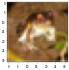

In [11]:
plot_sample(train_data, 0)

In [12]:
show_class(np.int(train_label[0]))

'frog'

# Data Preprocessing

In [13]:
# normalizing training data to scale 0 -1
train_data_norm = train_data / 255
test_data_norm = test_data / 255

In [14]:
# one-hot-encode train labels
train_label_cat = to_categorical(train_label)
test_label_cat = to_categorical(test_label)

In [45]:
# split data to train and validation sets
x_train, x_val, y_train, y_val = train_test_split(train_data_norm, train_label_cat, test_size = 0.25, stratify = train_label)

# Build Model

In [44]:
def build_model():
  model = Sequential()

  #CNN layers
  model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

  model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding ='same', activation='relu'))
  model.add(MaxPool2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(125, kernel_size =(3,3), strides = (1,1), padding ='same', activation='relu'))
  model.add(MaxPool2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  
  # Dense Layers
  # Input Layers
  model.add(Dense(1000, activation='relu'))
  model.add(Dropout(0.4))
  
  # Hidden Layers
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.4))

  model.add(Dense(250, activation ='relu'))
  model.add(Dropout(0.3))

  # Output layer
  model.add(Dense(10, activation ='softmax'))
  model.summary()

  # Complile model
  model.compile(loss='categorical_crossentropy',optimizer = 'rmsprop', metrics = ['accuracy'] )
  return model


In [ ]:
model = build_model()

# fit model
history = model.fit(x_train, y_train, epochs = 25, validation_data = (x_val, y_val), batch_size = 128)

# Visualize Model Performance

In [47]:
val_loss = history.history['val_loss']
epochs = range(1, len(val_loss)+ 1)

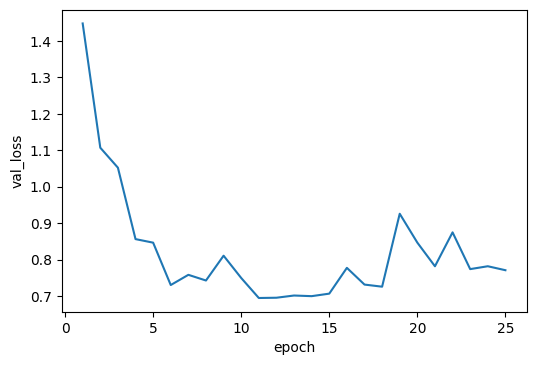

In [48]:
plt.figure(dpi = 100)
plt.plot(epochs, val_loss)
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

# Re-train model on the original dataset

In [ ]:
model = build_model()
model.fit(train_data_norm, train_label_cat, epochs = 11, batch_size = 128)

# Model Testing and Evaluation

In [54]:
show_class(np.argmax(model.predict(test_data_norm)[10]))

'airplane'

In [57]:
show_class(np.int(test_label[10]))

'airplane'

In [50]:
model.evaluate(test_data_norm, test_label_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.7831 - accuracy: 0.7398


[0.7830925583839417, 0.739799976348877]

In [92]:
y_pred = model.predict(test_data_norm)
y_pred_labels = [np.argmax(pred) for pred in y_pred]
y_pred_labels[:5]

[3, 8, 0, 0, 6]

In [98]:
test_label[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

# Visualize Model Evaluation

In [96]:
cm = confusion_matrix(test_label, y_pred_labels)

Text(0.5, 33.0, 'Predicted')

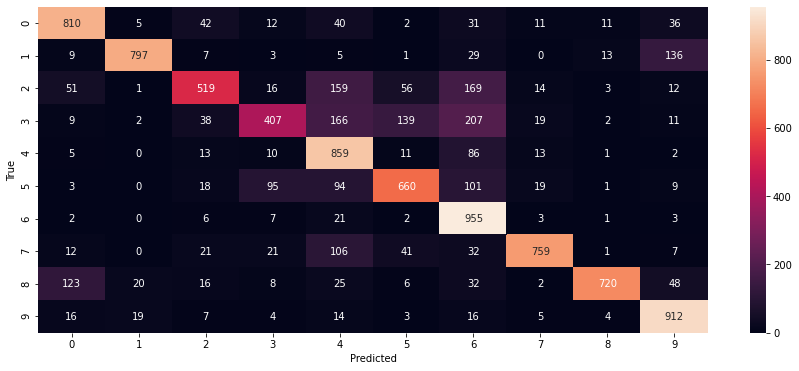

In [86]:
plt.figure(figsize = (15, 6))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.ylabel('True')
plt.xlabel('Predicted')